# Frozen Lake with Q-Learning

In this notebook, we implement Q-Learning and other two variants to solve the Frozen Lake environment from OpenAI Gym.
The algorithms are:
- Q-Learning
- Q-Learning with Eligibility Traces
- Q-Learning with Eligiility Traces and Spatial decay

In [1]:
import pandas as pd
import numpy as np
import gymnasium as gym
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Custom modules
from agent import *


SEED = 42

np.random.seed(SEED)

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=False, map_name='4x4')

# Gaussian kernel
kernel = lambda x, y : np.exp(-np.linalg.norm((x - y)/2) ** 2)

params = {
    'env': env,
    'discount_factor': 0.99,
    'initial_epsilon': 1.0,
    'epsilon_decay': 0.997,
    'min_epsilon': 0.00,
    'learning_rate': 0.99,
    'seed': SEED,
    # 'trace_decay': 0.9,
    # 'kernel': kernel
}

We train each agent 100 times for 2000 episodes, and we plot the average reward over the episodes for each agent.

In [3]:
n_sims = 100
n_episodes = 2_000
X = np.zeros((n_sims, n_episodes))

print("Q")
for i in (range(n_sims)):
    agent = QLambdaAgent(**params)
    rewards = agent.learn(n_episodes, 1000)
    X[i] = rewards
rewards_Q = pd.Series(X.mean(axis=0))

print("Q Lambda")
params['trace_decay'] = 0.9
for i in (range(n_sims)):
    agent = QLambdaAgent(**params)
    rewards = agent.learn(n_episodes, 1000)
    X[i] = rewards
rewards_QLambda = pd.Series(X.mean(axis=0))

print("Q Spatial Lambda")
params['kernel'] = kernel
params['trace_decay'] = 0.9
for i in (range(n_sims)):
    agent = QSpatialLambdaAgent(**params)
    rewards = agent.learn(n_episodes, 1000)
    X[i] = rewards
rewards_QLambda_kernel = pd.Series(X.mean(axis=0))

Q


100%|██████████| 2000/2000 [00:08<00:00, 231.72it/s]


Q Lambda


100%|██████████| 2000/2000 [00:00<00:00, 14290.47it/s]


Q Spatial Lambda


100%|██████████| 2000/2000 [00:00<00:00, 3565.47it/s]


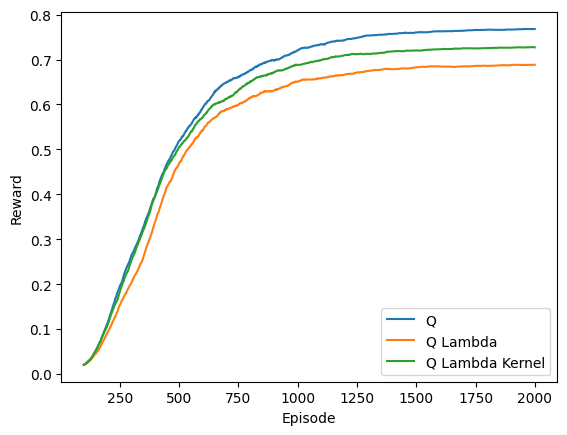

In [4]:
fig, ax = plt.subplots()
sma = 100
ax.plot(rewards_Q.rolling(sma).mean(), label='Q')
ax.plot(rewards_QLambda.rolling(sma).mean(), label='Q Lambda')
ax.plot(rewards_QLambda_kernel.rolling(sma).mean(), label='Q Lambda Kernel')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()

In [5]:
env.close()